In [11]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_path = "C:/Windows/Fonts/malgun.ttf" 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
df1 = pd.read_csv('./Data/서울시 인구현황_구.txt', sep = '\t', header = 1)
df1.head(3)

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…


In [12]:
df1 = df1.iloc[:, [0,1, 9 ,10, 11]]
df1.drop(0, axis = 0, inplace = True)
col_name=['년도', '자치구', '외국인', '외국인(남)','외국인(여)']
for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

df1.head(3)

,년도,자치구,외국인,외국인(남),외국인(여)
1,1991,합계,…,…,…
2,1991,종로구,…,…,…
3,1991,중구,…,…,…


In [13]:
df2 = df1.iloc[:, 0:5]
df2

,년도,자치구,외국인,외국인(남),외국인(여)
1,1991,합계,…,…,…
2,1991,종로구,…,…,…
3,1991,중구,…,…,…
4,1991,용산구,…,…,…
5,1991,성동구,…,…,…
...,...,...,...,...,...
764,2020,관악구,"14,743","6,872","7,871"
765,2020,서초구,"3,899","1,923","1,976"
766,2020,강남구,"4,824","2,379","2,445"
767,2020,송파구,"5,966","2,781","3,185"


In [14]:
df2['외국인'] = df2['외국인'].str.replace(',','').replace("…","0")
df2['외국인(남)'] = df2['외국인(남)'].str.replace(',','').replace("…","0")
df2['외국인(여)'] = df2['외국인(여)'].str.replace(',','').replace("…","0")
df2

,년도,자치구,외국인,외국인(남),외국인(여)
1,1991,합계,0,0,0
2,1991,종로구,0,0,0
3,1991,중구,0,0,0
4,1991,용산구,0,0,0
5,1991,성동구,0,0,0
...,...,...,...,...,...
764,2020,관악구,14743,6872,7871
765,2020,서초구,3899,1923,1976
766,2020,강남구,4824,2379,2445
767,2020,송파구,5966,2781,3185


In [15]:
df2 = df2.astype({ '외국인' : int,'외국인(남)' : int,'외국인(여)' : int})
df2.dtypes

년도        object
자치구       object
외국인        int32
외국인(남)     int32
외국인(여)     int32
dtype: object

조회할  년도을 입력하세요2020


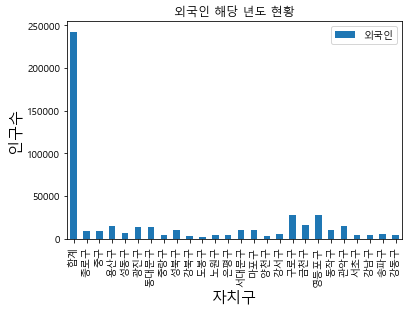

In [16]:
year = input('조회할  년도을 입력하세요')

df3 = df2[df2['년도'] == year]
df3.plot(kind ='bar', x = '자치구', y = '외국인')
plt.title('외국인 해당 년도 현황')
plt.xlabel('자치구', size=15)
plt.ylabel('인구수', size=15)
plt.show()



<ipython-input-17-73c1e9c3f855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['비율(남)'] = df2['외국인(남)'] / df2['합계']
<ipython-input-17-73c1e9c3f855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['비율(여)'] = df2['외국인(여)'] / df2['합계']


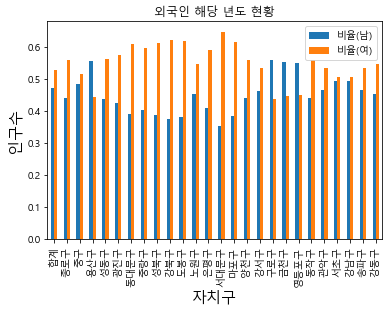

In [17]:
df2['합계'] = df2['외국인(남)'] + df2['외국인(여)']
df3['비율(남)'] = df2['외국인(남)'] / df2['합계']
df3['비율(여)'] = df2['외국인(여)'] / df2['합계']
df3.plot(kind ='bar', x = '자치구', y = ['비율(남)','비율(여)'])
plt.title('외국인 해당 년도 현황')
plt.xlabel('자치구', size=15)
plt.ylabel('인구수', size=15)
plt.show()